# 🙂‍↕️ World Happiness Analysis - Understanding the Drivers of Wellbeing

As someone who has always had the desire to live in a foreign country, I aimed to explore global happiness data to analyze which social, econimc, and health-related factors contribute most to a nation's happiness score.
So, this data project has certainly been one of my favorites thus far!

## 🧭 **What do you think?**

Will my future home (Spoiler alert: 🇨🇦) be among the happiest countries?

## 📊 Dataset

The dataset includes a variety of social-econimc indicators for each country, including:

- Country name
- Happiness Score / Ladder Score
- GDP per capital
- Social support
- Freedom to make life choices
- Healthy life expectancy
- Perceptions of corruption
- Generosity

🗂️ Source: Public dataset used in the Data Analyst certification program at **XDi**.

## 🔎 Key Questions Explored

- Which countries are the happiest in the world?
- What is the relationship between GDP per capital and happiness?
- How strongly do freedom and social support relate to happiness?
- Are there regional differences in happiness scores?
- How do corruption levels affect national wellbeing?
- What combination of factors best explains variations in happiness?

> 💬 **Note:** This project was completed as part of my Data Analyst certification program at **Experience Design Institut (XDi)**

### Preparation

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the world happiness dataset for 2019
url = 'https://raw.githubusercontent.com/imgraham1/539_FinalProject/master/world-happiness-report-2019.csv'
happiness_df = pd.read_csv(url)

In [8]:
# Select relevant columns
selected_columns = ['Country', 'Ladder', 'SD_of_Ladder', 'Positive_affect', 'Negative_affect', 'Social_support', 'Freedom', 'Corruption', 'Generosity', 'Log_of_GDP_per_capita', 'Healthy_life_expectancy', 'bins']
happiness_df = happiness_df[selected_columns]
happiness_df

,Country,Ladder,SD_of_Ladder,Positive_affect,Negative_affect,Social_support,Freedom,Corruption,Generosity,Log_of_GDP_per_capita,Healthy_life_expectancy,bins
0,Finland,156,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,bin1
1,Denmark,155,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,bin1
2,Norway,154,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,bin1
3,Iceland,153,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,bin1
4,Netherlands,152,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,bin1
...,...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,5,63,54.0,102.0,144.0,21.0,2.0,90.0,132.0,103.0,bin8
152,Tanzania,4,122,78.0,50.0,131.0,78.0,34.0,49.0,125.0,118.0,bin8
153,Afghanistan,3,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0,bin8
154,Central African Republic,2,117,132.0,153.0,155.0,133.0,122.0,113.0,152.0,150.0,bin8


### 📊 EDA

Q1: Which five countries were the happiest in 2019?

In [39]:
#2019's top5 happiest countries
top_5_happy = happiness_df.sort_values(by='Ladder', ascending=False).head(5)
top_5_happy

,Country,Ladder,SD_of_Ladder,Positive_affect,Negative_affect,Social_support,Freedom,Corruption,Generosity,Log_of_GDP_per_capita,Healthy_life_expectancy,bins
0,Finland,156,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,bin1
1,Denmark,155,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,bin1
2,Norway,154,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,bin1
3,Iceland,153,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,bin1
4,Netherlands,152,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,bin1


Scandinavian countries have always had a reputation for being overall happy, so this does not come by surprise. 

🇨🇦: Well, positioned at #9... I'll take it, with Germany as my current home sitting at #17. 

Q2: How does the happiness score distribute globally?

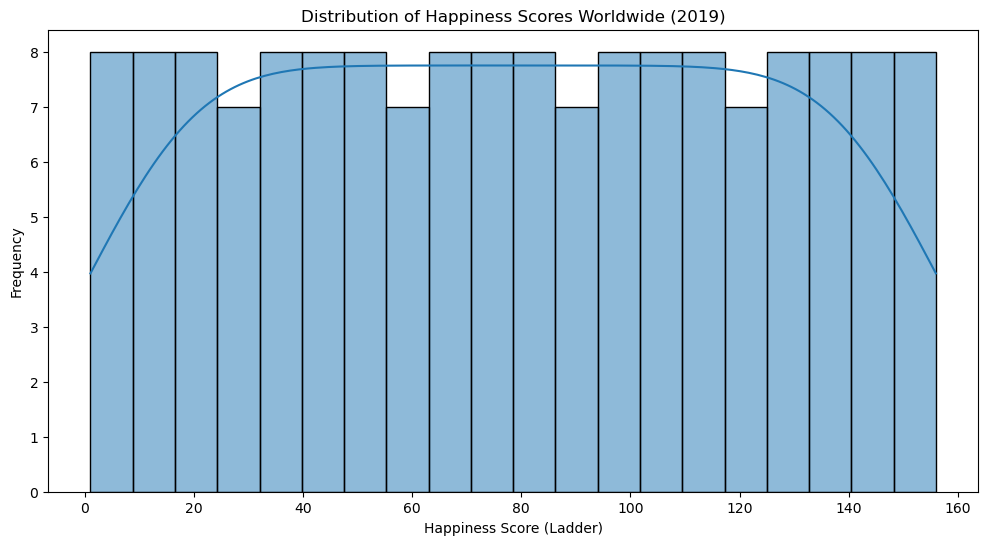

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(happiness_df['Ladder'], bins=20, kde=True)
plt.title('Distribution of Happiness Scores Worldwide (2019)')
plt.xlabel('Happiness Score (Ladder)')
plt.ylabel('Frequency')
plt.show()

The distribution of happiness score appears to be pretty even across the globe. 
There seem to be incredibly happy, unhappy and everything in between countries.

Q3: How do GDP per capital and happiness correlate?

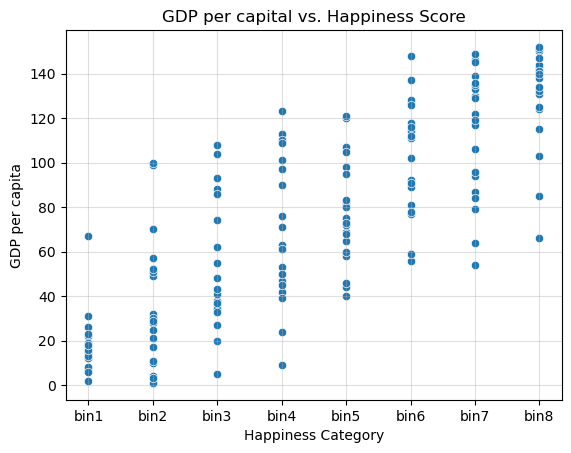

In [89]:
#Correlation: GDP per capital vs. happiness score
sns.scatterplot(x=happiness_df['bins'], y=happiness_df['Log_of_GDP_per_capita'])
plt.grid(True, alpha=0.4)
plt.title('GDP per capital vs. Happiness Score')
plt.xlabel('Happiness Category')
plt.ylabel('GDP per capita')
plt.show()

In [101]:
happiness_df['Ladder_reversed'] = 157 - happiness_df['Ladder']
correlation = happiness_df['Log_of_GDP_per_capita'].corr(happiness_df['Ladder_reversed'])
correlation.round(2)

0.81

There seems to be positive relation between both variables. 
So far, we cannot statistically prove that the happiness is due to a higher GDP per capital or due to a combination of other facots.

Q4: How does social support relate to national happiness?

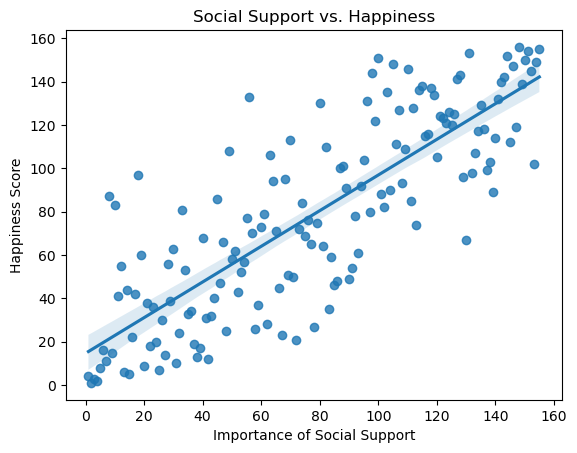

In [117]:
#Social Support vs. Happiness Score
sns.regplot(x=happiness_df['Social_support'], y=happiness_df['Ladder_reversed'])
plt.title('Social Support vs. Happiness')
plt.ylabel('Happiness Score')
plt.xlabel('Importance of Social Support')
plt.show()

In [115]:
correlation = happiness_df['Social_support'].corr(happiness_df['Ladder_reversed'])
correlation.round(2)

0.82

Strenghtening the social support system can have positive impacts on the national wellbeing.

Q5: How do countries distribute in terms of corruption perception?

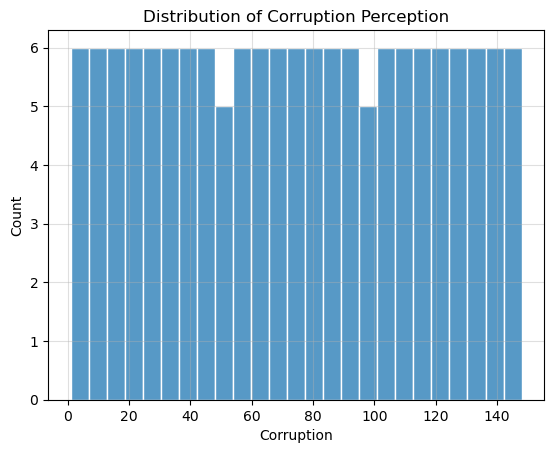

In [141]:
#Distribution of countries in perception of corruption
sns.histplot(happiness_df['Corruption'].dropna(), bins=25, edgecolor='white')
plt.grid(True, alpha=0.4)
plt.title('Distribution of Corruption Perception')
plt.show()

The perception of corruption seems to be very important for some countries, while it seems less important to others.
No clear trend to be detected here. 

Q6: How does generosity relate to the happiness score?

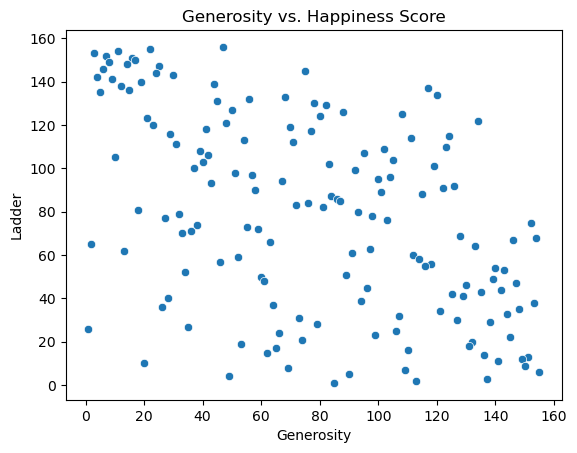

In [54]:
#Correlation: Generosity and Happiness Score
sns.scatterplot(x=happiness_df['Generosity'], y=happiness_df['Ladder'])
plt.title('Generosity vs. Happiness Score')
plt.show()

Surprisingly, there is no clear relation between both variables. 
I would have expected to see a positive relation between both. But apparently, living in a generoes country and society is not a driver for the overall happiness. 

Q7: What is the average healthy life expectancy of the ten most happy countries?

In [155]:
#Healthy life expectancy 
happiest_countries_10 = happiness_df.sort_values(by='Ladder', ascending=False).head(10)
happiest_countries_10

,Country,Ladder,SD_of_Ladder,Positive_affect,Negative_affect,Social_support,Freedom,Corruption,Generosity,Log_of_GDP_per_capita,Healthy_life_expectancy,bins,Ladder_reversed
0,Finland,156,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,bin1,1
1,Denmark,155,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,bin1,2
2,Norway,154,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,bin1,3
3,Iceland,153,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,bin1,4
4,Netherlands,152,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,bin1,5
5,Switzerland,151,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0,bin1,6
6,Sweden,150,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0,bin1,7
7,New Zealand,149,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0,bin1,8
8,Canada,148,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0,bin1,9
9,Austria,147,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0,bin1,10


In [157]:
avg_healthy_life_expectancy = happiest_countries_10['Healthy_life_expectancy'].mean()
avg_healthy_life_expectancy

15.1

Promoting health initiaves can have direct impact on the happiness score

Q8: How does the variable "positive affect" vary across regions?

/var/folders/0q/s7fj151s553_0czdxm4mtj680000gn/T/ipykernel_32323/3181786778.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Positive_affect', y='bins', data=happiness_df.sort_values('bins'), palette='Set2')


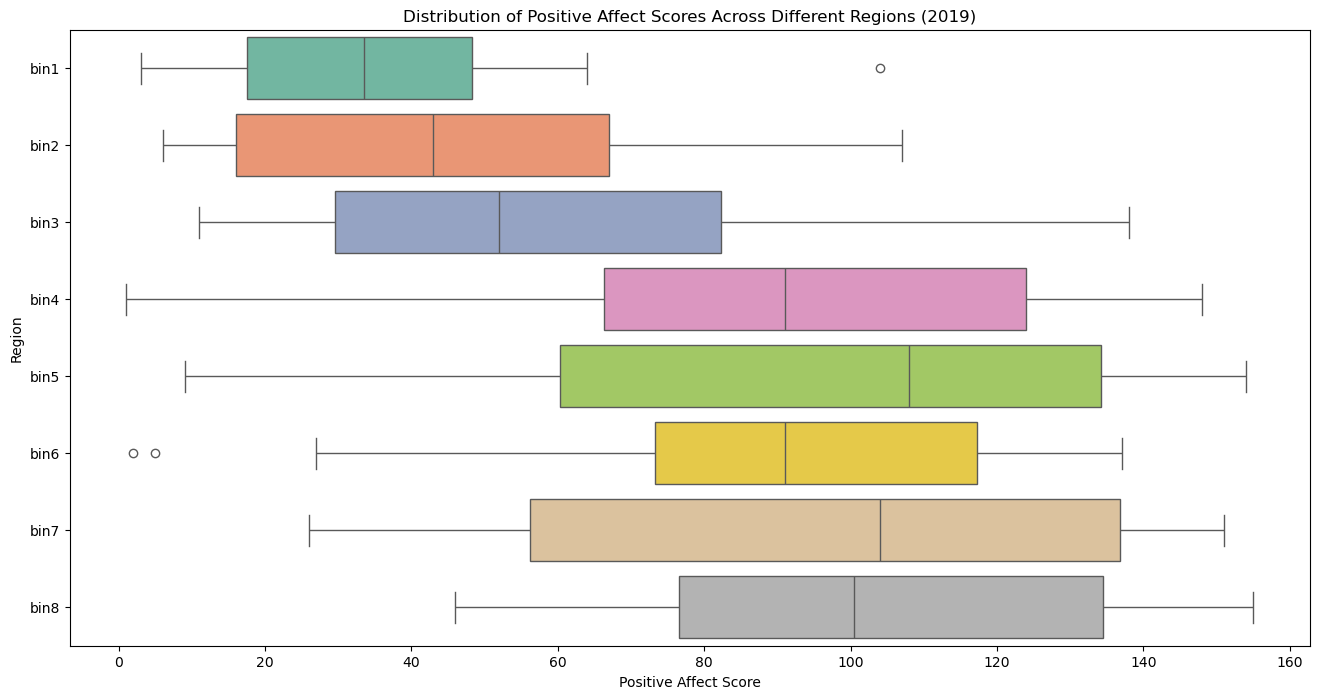

In [67]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Positive_affect', y='bins', data=happiness_df.sort_values('bins'), palette='Set2')
plt.title('Distribution of Positive Affect Scores Across Different Regions (2019)')
plt.xlabel('Positive Affect Score')
plt.ylabel('Region')
plt.show()

In [197]:
#Distribution of positive affect
positive_affect = happiness_df.groupby('bins')['Positive_affect'].mean()
positive_affect

bins
bin1     36.250000
bin2     45.315789
bin3     59.700000
bin4     89.000000
bin5     95.100000
bin6     86.550000
bin7     96.900000
bin8    105.200000
Name: Positive_affect, dtype: float64

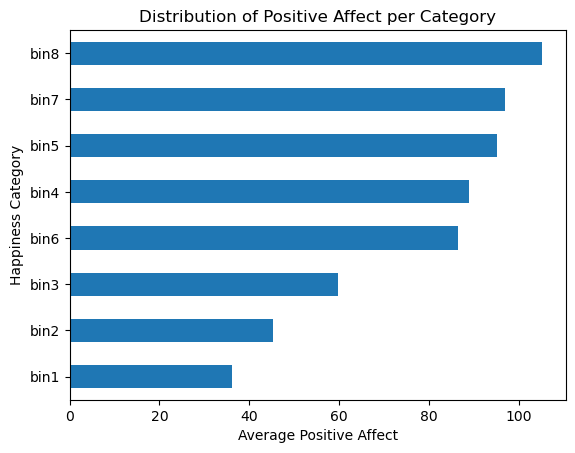

In [205]:
#Visualizing
positive_affect.sort_values().plot(kind='barh')
plt.title('Distribution of Positive Affect per Category')
plt.xlabel('Average Positive Affect')
plt.ylabel('Happiness Category')
plt.show()

This is a very meaningful insight: the average positive affect (indicator for feeling joy on the prior day) is stronger for higher bins. 
That means even if countries have a lower happiness score, they tend to be more joyful compared to citizens of supposedly happy countries.

Q9: What is the average perception of freedom in countries with a low corruption perception?

In [73]:
#Avg perceptionof freedom for countries with low corruption perception
#Defining low corruption
low_corruption = happiness_df[happiness_df['Corruption'] < 50]

#Avg freedom for those countries
avg_freedom_low_corruption = low_corruption['Freedom'].mean()
avg_freedom_low_corruption.round(2)

print(f'The average freedom perception für countries with a low corruption perception is {avg_freedom_low_corruption:.2f}')

The average freedom perception für countries with a low corruption perception is 55.20


Q10: How do negative affect scores distribute for countries with different GDP per capita?

/var/folders/0q/s7fj151s553_0czdxm4mtj680000gn/T/ipykernel_32323/1908446877.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Negative_affect', y='bins', data=happiness_df.sort_values('bins'), palette='coolwarm')


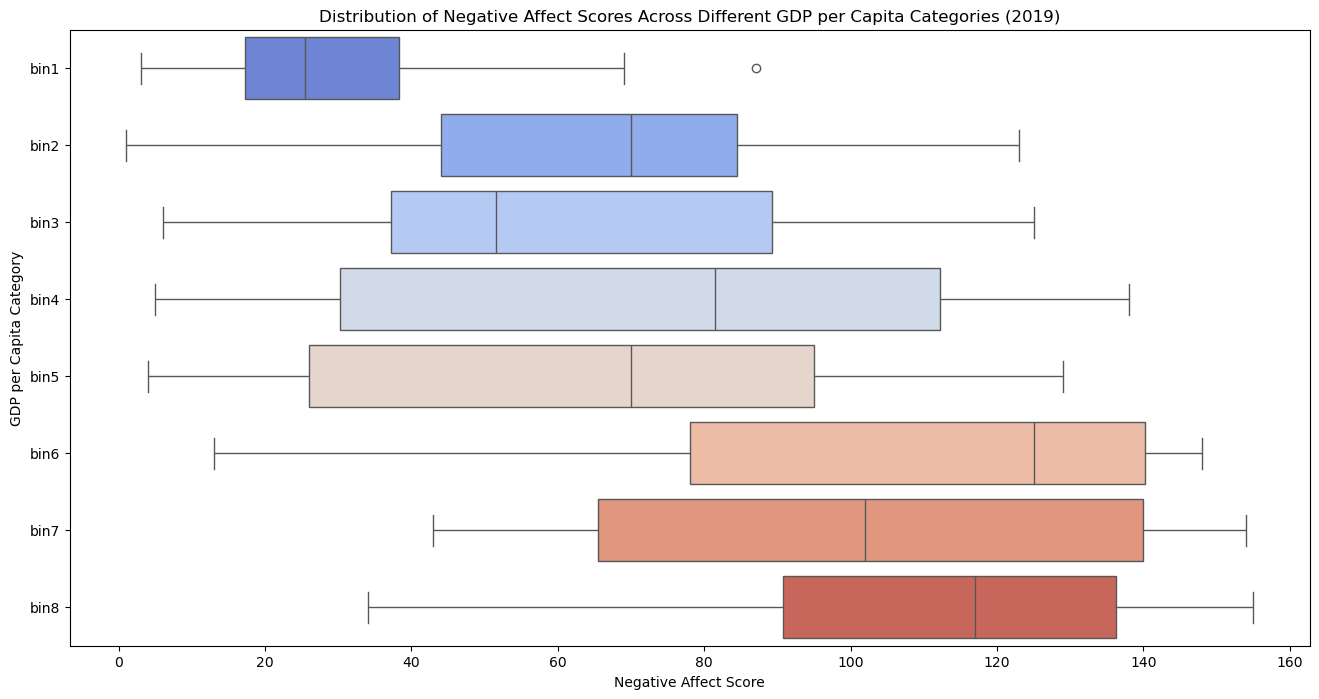

In [76]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Negative_affect', y='bins', data=happiness_df.sort_values('bins'), palette='coolwarm')
plt.title('Distribution of Negative Affect Scores Across Different GDP per Capita Categories (2019)')
plt.xlabel('Negative Affect Score')
plt.ylabel('GDP per Capita Category')
plt.show()

<Axes: xlabel='Log_of_GDP_per_capita', ylabel='Negative_affect'>

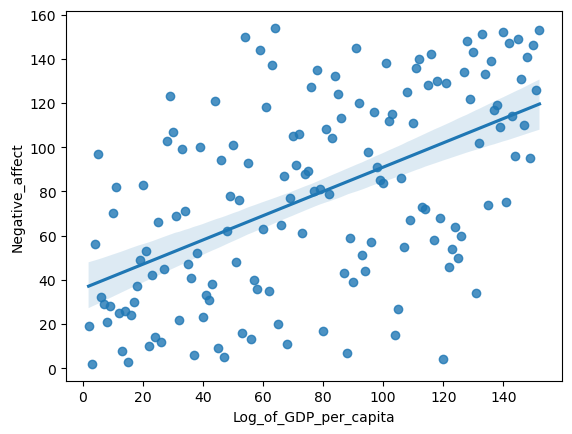

In [253]:
sns.regplot(x=happiness_df['Log_of_GDP_per_capita'], y=happiness_df['Negative_affect'])

Again, another meaningful insight: the variable negative affect (that is the experience of negative mood) tends to rise with the GDP per capital.

Q11: What is the average happiness per region?

In [83]:
#Durchschnittliche Zufriedenheit per Region
avg_happiness_per_bin = happiness_df.groupby(by='bins').Ladder.agg('mean').to_frame()
avg_happiness_per_bin

,Ladder
bins,
bin1,148.5
bin2,130.5
bin3,110.5
bin4,90.5
bin5,70.5
bin6,50.5
bin7,30.5
bin8,10.5


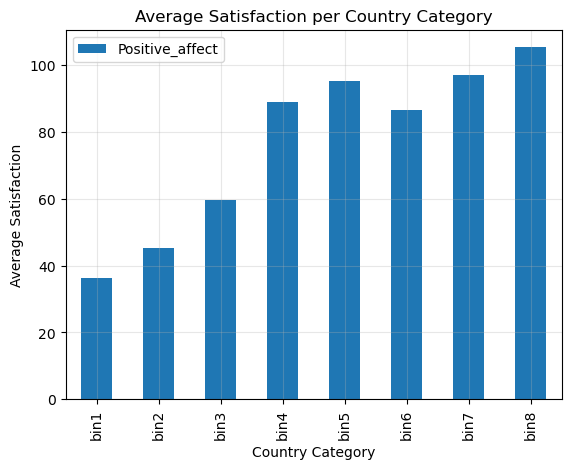

In [277]:
#Visualizing
avg_happiness_per_bin.plot(kind='bar')
plt.title('Average Satisfaction per Country Category')
plt.xlabel('Country Category')
plt.ylabel('Average Satisfaction')
plt.grid(True, alpha=0.3)
plt.show()

Again, we see that countries of bin8 have the highest satisfaction rate on average.

Q12: How does the distribution of freedom vary across regions?

In [281]:
#Distribution of freedom per region
distr_freedom = happiness_df.groupby(by='bins').Freedom.agg('mean')
distr_freedom

bins
bin1     22.125000
bin2     59.631579
bin3     60.500000
bin4     79.050000
bin5     88.150000
bin6     91.400000
bin7    101.200000
bin8    109.850000
Name: Freedom, dtype: float64

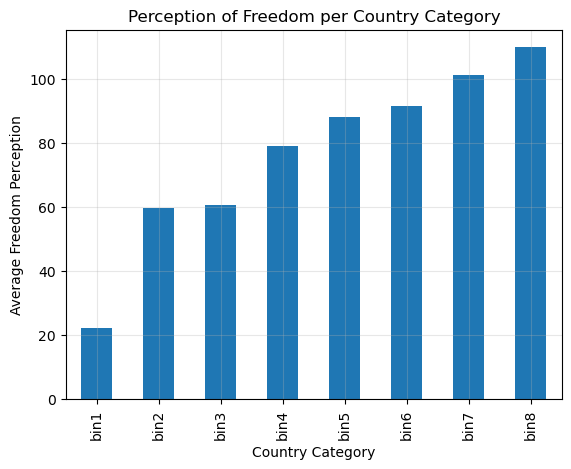

In [287]:
#Visualizing
distr_freedom.plot(kind='bar')
plt.title('Perception of Freedom per Country Category')
plt.xlabel('Country Category')
plt.ylabel('Average Freedom Perception')
plt.grid(True, alpha =0.3)
plt.show()

Again, regions of bin8 have the highest score here. 
What strikes here: If we go back to Q1 where we analyzed the 5 happiest countries, they were all in bin1. Those countries have the lowest average freedom perception. That is interesting, to say the least.

Q13: What is the correlation between social support and generosity?

In [90]:
correlation_support_generosity = happiness_df['Social_support'].corr(happiness_df['Generosity'])
print(f'Correlation between Social Support and Generosity: {correlation_support_generosity:.2f}')

Correlation between Social Support and Generosity: 0.44


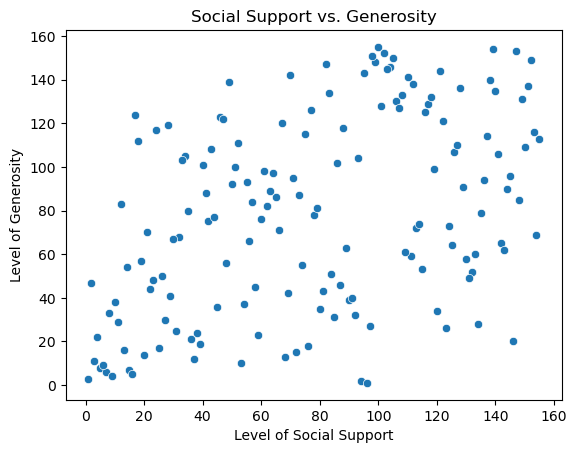

In [293]:
#Social support vs Generosity
sns.scatterplot(x=happiness_df['Social_support'], y=happiness_df['Generosity'])
plt.title('Social Support vs. Generosity')
plt.xlabel('Level of Social Support')
plt.ylabel('Level of Generosity')
plt.show()

A positive relation between both variables can be observed. The higher the level of social security, the higher the level of generosity. 
However, the dataset also shows a fair amount of outliers. There is countries with very low social security that have a higher level of generosity. 
Further analysis could dive deeper into this. Who are those countries, what makes them the way they are?

Q14: How does healthy life expectancy vary in countries with higher and lower corruption perception?

In [347]:
#Variance of healthy life expectancy in country with high and low corruption
#Defining low and high corruption
low_corruption = happiness_df[happiness_df['Corruption'] < 50]
high_corruption = happiness_df[happiness_df['Corruption'] > 50]

def corruption_level(row):
    if row.Corruption < 50:
        return 'Low'
    else:
        return 'High'


happiness_df['Corruption_level'] = happiness_df.apply(corruption_level, axis=1)

In [354]:
#Grouping and calculating average 
life_expectancy_by_corruption = happiness_df.groupby('Corruption_level')['Healthy_life_expectancy'].mean().to_frame()
life_expectancy_by_corruption.round(2)

,Healthy_life_expectancy
Corruption_level,
High,81.94
Low,60.93


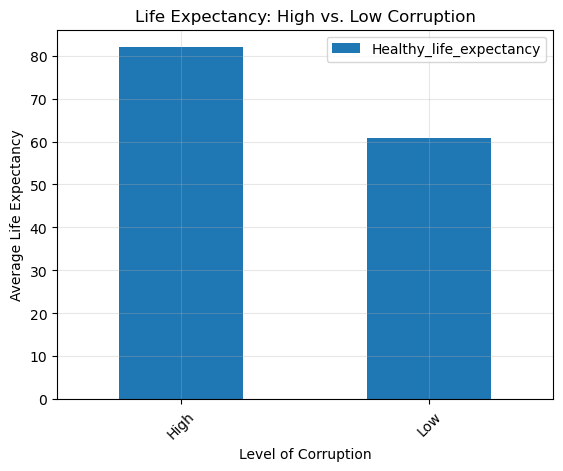

In [358]:
life_expectancy_by_corruption.plot(kind='bar')
plt.title('Life Expectancy: High vs. Low Corruption')
plt.xlabel('Level of Corruption')
plt.ylabel('Average Life Expectancy')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

Q15: How do generosity levels depend on freedom?

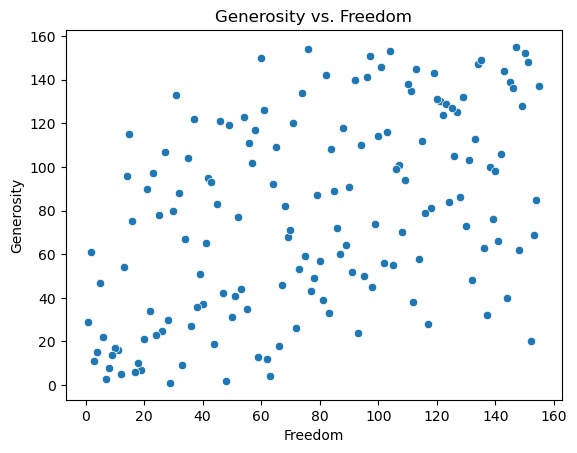

In [320]:
#Distribution of Generosity depending on Freedom
sns.scatterplot(x=happiness_df['Freedom'], y=happiness_df['Generosity'])
plt.title('Generosity vs. Freedom')
plt.show()

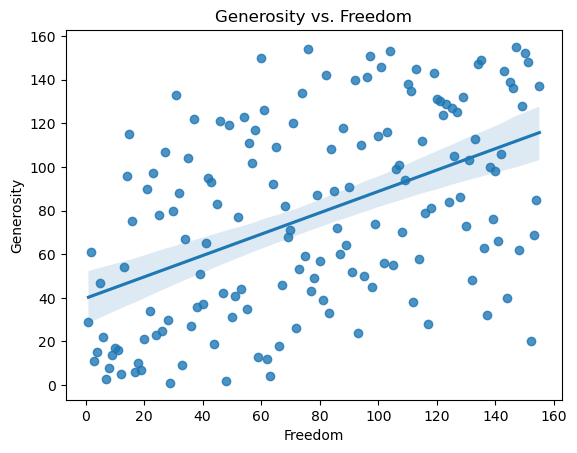

In [322]:
sns.regplot(x=happiness_df['Freedom'], y=happiness_df['Generosity'])
plt.title('Generosity vs. Freedom')
plt.show()

On average, a higher freedom perception leads to acts of generosity.